Name : Lany Malis
<br>
Class: ITE-A
<br>
Project: Animal Recognition

# Animal Recognition Using Convolutional Neural Networks

Animal Recognition is a project which recognize animal images by do predicting between the input images and the model images that has been trained with Machine learning algorithms. In this project, we implement one of the most popular machine learning algorithms is Convolutional Neural Networks. Convolutional Neural Networks is an algorithms which is specialized for Image recognition and Image classification. By using CNNs, we need to do several important steps such as Image transformation, Data Loading, Building Convolutional Neural Network Model, Training the Model and Saving the best model. To implement CNNs Algorithms, we use Pytorch Machine learning Framework to access the below library in purpose to implement CNNs conveniently.

## 1. Libraries

- **os** : provide a way of using operating system depent functionality such as reading and writing to file system. 
- **numpy** : support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- **torch** : is opensource machine learning framework.
- **glob** : is a module which provide ability to search for the file in the directory.
- **torch.nn** : is module which provice the various neural network layer and loss function.
- **transforms** : is a module which is able to do transformation on the images such as resizing, flipping, cropping, normalizing.
- **DataLoader** : provide the ability to load and iterate through all the data including shuffling and batching.
- **torchvision** : provide access to the model architecture such as CNNs architechture.
- **torch.optim** : provide various optimiser to update the parameter while training.
- **pathlib** : provide class which's accessible to working with file paths.
- **matplotlib.pyplot** : provide the option to show the graph, pie, list.

In [20]:
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torchvision
import torch.optim as optim
import pathlib 
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

## 2. Checking Device

Using Pytorch is allowed to specify the device to perform computations for neural network model. Pytorch can run both CPUs and GPUs, but choosing the appropriate device can improve the performance of model.

In [3]:
#Checking Device if it is CPUs or GPUs (cuda)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
#Dislay device's type
print(device)

cpu


## 3. Image Transformation

Transforming images is to defines the input images's standard which will be fed to build the nueral network model for training. Image Transformation can improve the performance, robustness, and memory efficiency of the model.

To ensure the accuracy are consistent and reproducible across different experiment, Performing Image transformation is required. 

Here are several steps of Image transformation:

1. **Resizing** : All input images are required to be the same size in Neural networks in purpose to improve Memory efficiency, Computional efficiency, Compatibility and Performance.
2. **Data augmentation (HorizontalFlip)** : is used to increase the size of the training dataset by applying a variety of transformations in purpose to improve the generalization of the model by exposing it to the wider range of input variations.
3. **Normalization**: standardized images can enhance the performance of Neural networks and it helps to ensure that all input features have similar scale and range, which improve the convergence of model during training.
   - By using Pytorch, transform.ToTensor is required to use for converting input image of size (Height, Width, Channels) to tensor format (Channels, Height, Width) and also for normalizing the pixel values of the input image to the range [0, 1] which improve the convergence of the model.
   - Substracting the mean and divide by standard deviation of the input data is a common way. By this below normalizing, the pixel values will be in [-1, 1].


In [5]:
#Transforms
transformer = transforms.Compose([
    transforms.Resize((100, 100)), 
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), #0-255 to 0-1, numpy to tensors form
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]) # 0-1 to [-1, 1], result = x-mean/standard deviation
])

## 4. Data Loading

There are 3 steps for loading dataset to implement the algorithms such as:
  1. **Determine the Path** : Determine the location of the Dataset in Device and it's acessible.
<br>
  2. **Loading Dataset** : In this, We load dataset by creating ImageFolder dataset class form torchvision.dataset module by destinate the directory (train_path) with transformimg the images using transform parameter which's holding the transformer function. Also, We control the loading by load 265 images at a time and we do shuffle to make our training more robustness and generalize.
<br>
  3. **Divide Dataset Categories** : First, we create the variable of pathlib to access the file. Second, we split the image of each category by slash '/' and retrieve all images in each folder. Last, we sort the name of each category by alphabet.  
 

In [6]:
#Path for training and testing directory 
train_path = r'C:/Users/User/Desktop/Recognition/CatDog/training_set'
test_path = r'C:/Users/User/Desktop/Recognition/CatDog/test_set'

#Load training Dataset
train_loader = DataLoader(
    torchvision.datasets.ImageFolder(train_path, transform = transformer),
    batch_size=256, shuffle=True
)
#Load Testing Dataset
test_loader = DataLoader(
    torchvision.datasets.ImageFolder(test_path, transform = transformer),
    batch_size=256, shuffle=True  
)

- Show Train_Loader image after Transformation 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

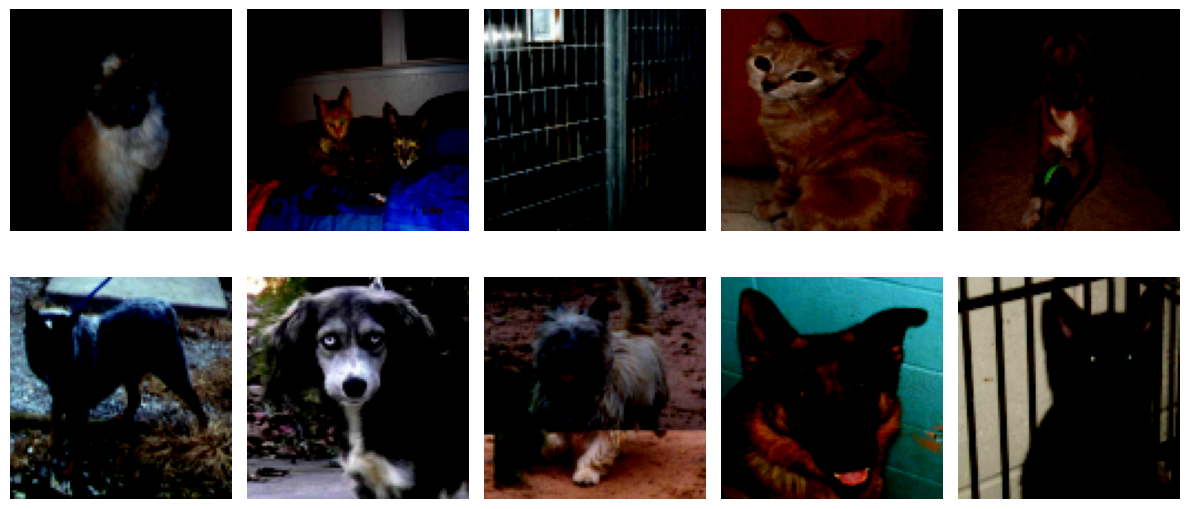

In [7]:
# Counter to keep track of displayed images
displayed_images = 0

# Create a subplot with 2 rows and 5 columns
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# Iterate over the DataLoader to get batches of images and labels
for batch_images, batch_labels in train_loader:
    # Iterate over the images in the current batch
    for image, ax in zip(batch_images, axes.flatten()):
        # Convert the PyTorch tensor to a NumPy array
        image = image.numpy()

        # Convert the image from CHW to HWC format
        image = np.transpose(image, (1, 2, 0))

        # Display the image on the corresponding subplot
        ax.imshow(image)
        ax.axis('off')

        # Increment the displayed image counter
        displayed_images += 1

        # Check if we have displayed 10 images
        if displayed_images == 10:
            break

    # Check if we have displayed 10 images
    if displayed_images == 10:
        break

# Adjust the spacing between subplots
plt.tight_layout()

# Display the grid of images
plt.show()

- Show Tested_Loader image after Transformation 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

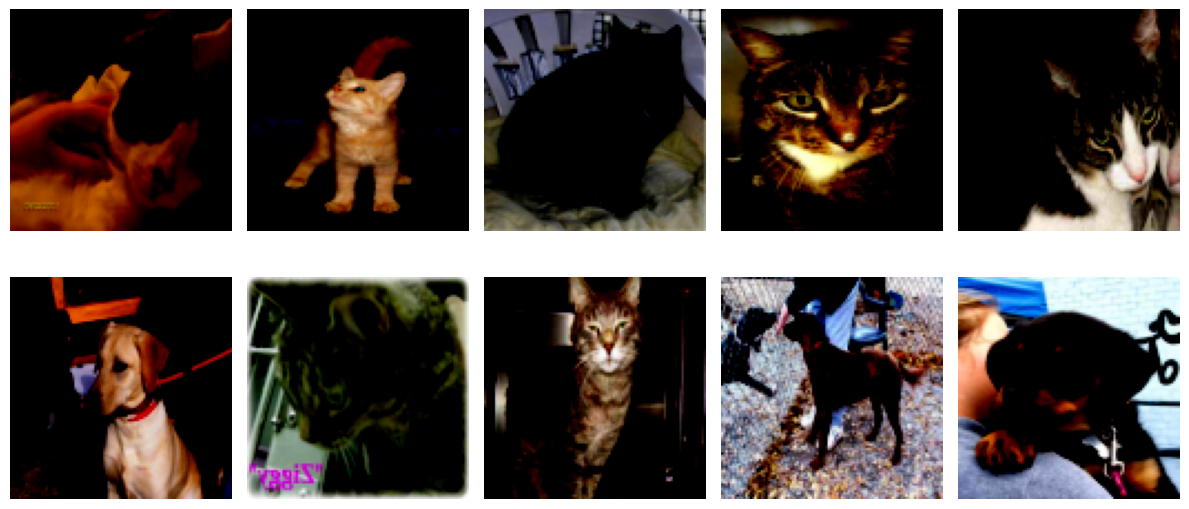

In [7]:
# Counter to keep track of displayed images
displayed_images = 0

# Create a subplot with 2 rows and 5 columns
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# Iterate over the DataLoader to get batches of images and labels
for batch_images, batch_labels in test_loader:
    # Iterate over the images in the current batch
    for image, ax in zip(batch_images, axes.flatten()):
        # Convert the PyTorch tensor to a NumPy array
        image = image.numpy()

        # Convert the image from CHW to HWC format
        image = np.transpose(image, (1, 2, 0))

        # Display the image on the corresponding subplot
        ax.imshow(image)
        ax.axis('off')

        # Increment the displayed image counter
        displayed_images += 1

        # Check if we have displayed 10 images
        if displayed_images == 10:
            break

    # Check if we have displayed 10 images
    if displayed_images == 10:
        break

# Adjust the spacing between subplots
plt.tight_layout()

# Display the grid of images
plt.show()

In [8]:
#Categories
root = pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [9]:
#Display the categories 
print(classes)

['cats', 'dogs']


## 5. Define Convolutional Neural Networks Model

Creating ConvNet subclass of nn.Module class is essential for establishing the neural network architecture.

In below block, There are only 2 Methods ConvNet class:
<br>
1. **__init__** : is a default constructor method which's created when instance of ConvNet is called. In this ConvNet Architecture, There are 5 layers of Convolutional Neural Networks such as:
<br>
  - *First Convolutional Layers* : is responsible for extracting the most basic feature, reduce dimensonality of image and create feature map by  taking 3 colors channel image, using 12 filters with size of 3*3 pixels filter, using padding 1 to make the output size is as same as input size, and using stride 1 (same stride) to move by 1 pixels. Also, BatchNorm2d calculates the mean and variance of the activations within each channel across the mini-batch in purpose to capture different features in detail. As well as, we use Relu to get the result output in tensor format which the negative value will set to 0.
<br>
  - *Pooling Layer* : is used for reduce the image size, computational cost and enhances features. Also, we reduce the image size by factor by 2. 
<br>
  - *Second Convolutional Layer* 
  - *Third Convolutional Layer* 
<br>
  - *Fully Connected Layer* : is used to classifies the output of each category and associate features to a particular label. 
<br>
2. **Forward Function** : is used for specify the input data flow through the network layers to get the final output.


In [10]:
#CNN Network
class ConvNet(nn.Module):
    def __init__(self, num_classes=2):
        
        #Constructor of parent classes
        super(ConvNet, self).__init__()
        
        #Output size after convolution filter
        #((w-f+2P)/s)+1
        
        #Input shape= (256,3, 100, 100)
        
        #Convolutional Layers
        self.conv1=nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
           #Shape=(256, 12, 100, 100)
        self.bn1=nn.BatchNorm2d(num_features=12)
           #Shape=(256, 12, 100, 100)
        self.relu1=nn.ReLU()
           #Shape=(256, 12, 100, 100)
        
        #Pooling Layer
        self.pool=nn.MaxPool2d(kernel_size=2)
          #Reduce the image size be factor 2
          #Shape=(256, 12, 50, 50)
        
        #Second Convolutional Layers
        self.conv2=nn.Conv2d(in_channels=12, out_channels=20, kernel_size=3, stride=1, padding=1)
          #Shape=(256, 20, 50, 50)
        self.relu2=nn.ReLU()
          #Shape=(256, 20, 50, 50)
        
        #Third Convolutional Layers
        self.conv3=nn.Conv2d(in_channels=20, out_channels=32, kernel_size=3, stride=1, padding=1)
          #Shape=(256, 32, 50, 50)
        self.bn3=nn.BatchNorm2d(num_features=32)
          #Shape=(256, 32, 50, 50)
        self.relu3=nn.ReLU()
          #Shape=(256, 32, 50, 50)
            
        #Fully Connected Layer
        self.fc=nn.Linear(in_features=32*50*50, out_features=num_classes)
        
        
    #Feed forward function
    def forward(self, input):
        #Output of First Convolutional layer
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
        #Output of Maxpooling layer
        output=self.pool(output)
        
        #Output of Second Convolutional Layer
        output=self.conv2(output)
        ouput=self.relu2(output)
        #Output of Third Convolutional Layer
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)

        #Above output will be in matrix form, with shape(256, 32, 50, 50)
        output=output.view(-1, 32*50*50)
        #Output of Fully-Connected Layers
        output=self.fc(output)

        #Return Final Output Feature
        return output
   

- Create the object of ConvNet class and specify the device 

In [11]:
#Creates an instance of the ConvNet class 
model=ConvNet(num_classes=2).to(device)

- Optimiser is responsible for updating the parameters of the model during the training process by learning rate = 0.001 which determine the step size in each update and weight_decay = 0.0001 to minimize the Model weight to loss which cause overfitting.

In [12]:
#Optimizer
optimizer=optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()

- Assign epoch number for determine the number of the model will train passes over the entire training dataset.

In [13]:
#Assign epochs's value
num_epochs=10

- Counting the number of image in each train folder and test folder.

In [14]:
#Calculating the size of training and testing images
train_count=len(glob.glob(train_path+ '/**/*.jpg'))
test_count=len(glob.glob(test_path+ '/**/*.jpg'))

In [15]:
#Display total of train's image and total of test's image
print(train_count, test_count)

8005 2023


## 6. Training Model and Saving

In this training Model section, Our objective is to do the prediction between the images and label which images is taken to process by ConvNet Module and labels get after do Image Transformation. Then we do compare between the prediction output and expecting output and calculate the total train_loss, train_accuracy, test_accuracy, and its total averages. We do iterating in 10 epoch. Last, we go through all the result in 10 epoch and saving the best Model.

In [17]:
best_accuracy = 0.0
train_result = []
test_result = []
precision_result = []
recall_result = []
f1_score_result = []
confusion_matrix_result = []

for epoch in range(num_epochs):

    # Evaluation and training on training dataset
    model.train()
    train_accuracy = 0.0
    train_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        if device:
            images = Variable(images.to(device))
            labels = Variable(labels.to(device))
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.cpu().data * images.size(0)
        _, prediction = torch.max(outputs.data, 1)
        train_accuracy += int(torch.sum(prediction == labels.data))

    train_accuracy = train_accuracy / train_count
    train_loss = train_loss / train_count
    train_result.append(train_accuracy)

    # Evaluation on testing dataset
    model.eval()

    test_accuracy = 0.0
    test_predictions = []
    test_labels = []

    for i, (images, labels) in enumerate(test_loader):
        if device:
            images = Variable(images.to(device))
            labels = Variable(labels.to(device))
        outputs = model(images)
        _, prediction = torch.max(outputs.data, 1)
        test_accuracy += int(torch.sum(prediction == labels.data))
        test_predictions.extend(prediction.cpu().numpy())
        test_labels.extend(labels.data.cpu().numpy())

    test_accuracy = test_accuracy / test_count
    test_result.append(test_accuracy)

    # Calculate precision, recall, and F1-Score
    precision = precision_score(test_labels, test_predictions, average='weighted')
    recall = recall_score(test_labels, test_predictions, average='weighted')
    f1 = f1_score(test_labels, test_predictions, average='weighted')
    precision_result.append(precision)
    recall_result.append(recall)
    f1_score_result.append(f1)

    # Calculate confusion matrix
    confusion_matrix_result.append(confusion_matrix(test_labels, test_predictions))

    print('Epoch: ' + str(epoch) + ' Train Loss: ' + str(int(train_loss)) +
          ' Train Accuracy: ' + str(train_accuracy) +
          ' Test Accuracy: ' + str(test_accuracy) +
          ' Precision: ' + str(precision) +
          ' Recall: ' + str(recall) +
          ' F1-Score: ' + str(f1) + '\nConfusion Matrix (Epoch ' + str(epoch) + '):')
    print(confusion_matrix_result[epoch])

    if test_accuracy > best_accuracy:
        torch.save(model.state_dict(), 'best_checkpoint.model')
        best_accuracy = test_accuracy

Epoch: 0 Train Loss: 0 Train Accuracy: 0.8624609618988133 Test Accuracy: 0.7449332674246169 Precision: 0.7453615172803272 Recall: 0.7449332674246169 F1-Score: 0.744825899731294
Confusion Matrix (Epoch 0):
[[774 237]
 [279 733]]
Epoch: 1 Train Loss: 0 Train Accuracy: 0.8940662086196127 Test Accuracy: 0.6549678695007415 Precision: 0.7400461669465355 Recall: 0.6549678695007415 F1-Score: 0.6215124040796117
Confusion Matrix (Epoch 1):
[[963  48]
 [650 362]]
Epoch: 2 Train Loss: 0 Train Accuracy: 0.8614615865084322 Test Accuracy: 0.7103311913000494 Precision: 0.750302282078581 Recall: 0.7103311913000494 F1-Score: 0.6983311612546421
Confusion Matrix (Epoch 2):
[[920  91]
 [495 517]]
Epoch: 3 Train Loss: 0 Train Accuracy: 0.8435977514053716 Test Accuracy: 0.736035590706871 Precision: 0.7519518209049423 Recall: 0.736035590706871 F1-Score: 0.7318248927656927
Confusion Matrix (Epoch 3):
[[871 140]
 [394 618]]
Epoch: 4 Train Loss: 0 Train Accuracy: 0.9090568394753279 Test Accuracy: 0.7419673751853

## 7. Conclusion

Through this implement, We finally get the maximum around 87 percentage of training accuracy and 73 percentages of test accuracy. Based on whole process of implement, the challeging that cause to lose some accurate are dataset, image preprocessing and our model of architecture. 

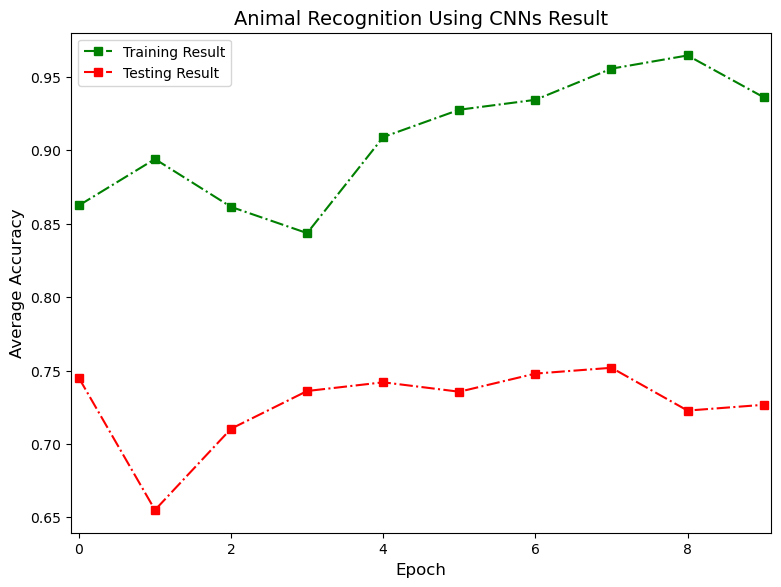

In [18]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fig = plt.figure(figsize = (7,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Animal Recognition Using CNNs Result', fontsize = 14)
ax.set_xlabel('Epoch', fontsize = 12)
ax.set_ylabel('Average Accuracy', fontsize = 12)
plt.xlim(-0.1, 9.1)
plt.plot(x, train_result, '-.gs', label = 'Training Result')
plt.plot(x, test_result,'-.rs', label = 'Testing Result')

ax.legend()

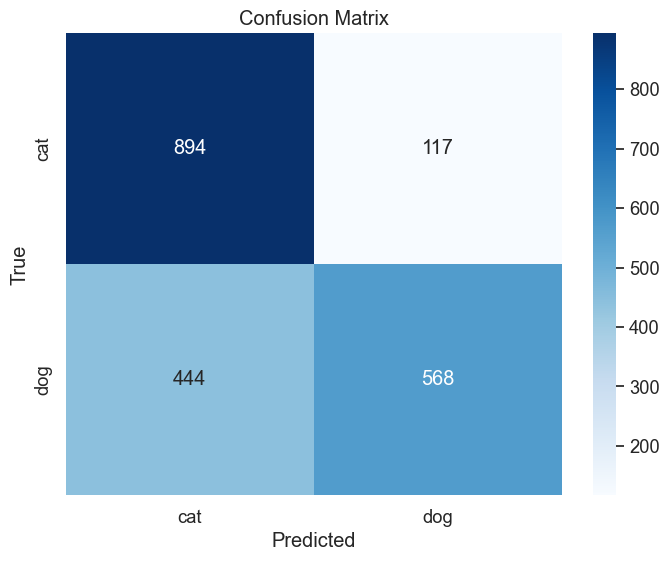

In [21]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_result[8], annot=True, fmt='g', cmap="Blues",xticklabels=['cat', 'dog'], yticklabels=['cat', 'dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## 8. Reference


-Covolutional Neural Network: https://en.wikipedia.org/wiki/Convolutional_neural_network
<br>
-Pytorch Machine Learning Framework: https://en.wikipedia.org/wiki/PyTorch
<br>
-Pytorch's Module : https://pytorch.org/docs/stable/generated/torch.max.html
<br>
-Resize Image: https://keras.io/examples/vision/learnable_resizer/
<br>
-Data Loader:  https://youtu.be/eGch5tZry84 
<br>
-Batch Normalization:  https://youtu.be/DtEq44FTPM4
<br>
-Stride : https://youtu.be/lxk_nmpqI5M
<br>
-Padding : https://youtu.be/-1xVmU8Z6Bs
<br>
-Max Pooling layers: https://youtu.be/zg_AA3fZpE0
<br>
-Fully Connected layers: https://youtu.be/rxSmwM7z0_4
<br>
-CNNs Architecture: https://youtu.be/VF4BDE7uqY0
<br>
-Image Classification: https://youtu.be/9OHlgDjaE2I 
<br>
-Image Inference: https://youtu.be/zwHSQrNVNNE
<br>
